loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Sign-Image-Detection-2 in yolokeras:: 100%|██████████| 378/378 [00:00<00:00, 7298.27it/s]


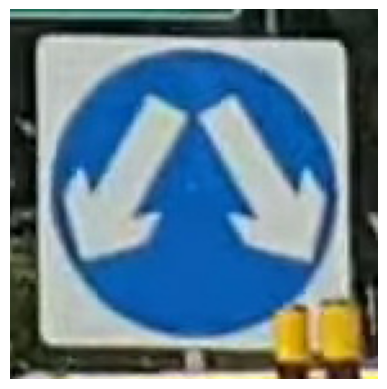

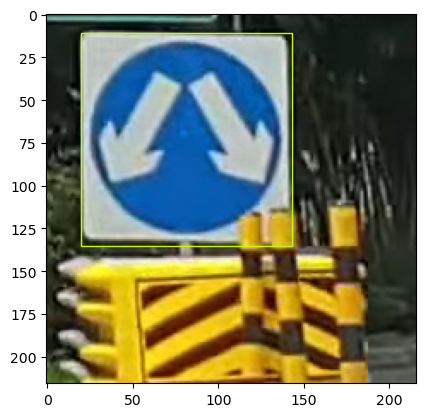

None


KeyboardInterrupt: 

In [6]:
#!pip install roboflow
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle

from roboflow import Roboflow
rf = Roboflow(api_key="5QKKlp6IjU5UTbSv406u")
project = rf.workspace("is4242-gmgjf").project("road-sign-image-detection")
version = project.version(2)
dataset = version.download("yolokeras")

model = version.model
# Optionally, change the confidence and overlap thresholds (values are percentages)
model.confidence = 60
model.overlap = 35

# Define the folder containing images
images_folder = 'data_2/TEST/8'

# Create a list to store predictions
all_predictions = []

# Loop through the images folder
# Extra padding around the bounding box
padding = 10  # Adjust this value as needed

# Loop through the images folder
for image_file in os.listdir(images_folder):
    if image_file.endswith('.jpg') or image_file.endswith('.jpeg') or image_file.endswith('.png'):
        # Load the image
        image_path = os.path.join(images_folder, image_file)
        image = mpimg.imread(image_path)
        prediction = model.predict(image_path)
        
        # Extract predictions as JSON
        predictions_json = prediction.json()
        #print(predictions_json)
        # Crop the image to include some extra space around the bounding box
        for bounding_box in predictions_json['predictions']:
            x = bounding_box['x']
            y = bounding_box['y']
            width = bounding_box['width']
            height = bounding_box['height']
            
            # Calculate corner points with extra padding
            x1 = int(x - (width / 2) - padding)
            y1 = int(y - (height / 2) - padding)
            x2 = int(x + (width / 2) + padding)
            y2 = int(y + (height / 2) + padding)
            
            # Ensure the cropped area is within the image bounds
            x1 = max(x1, 0)
            y1 = max(y1, 0)
            x2 = min(x2, image.shape[1])
            y2 = min(y2, image.shape[0])
            
            # Crop the image
            cropped_image = image[y1:y2, x1:x2]
            
            # Plot the cropped image
            plt.imshow(cropped_image)
            plt.axis('off')
            plt.show()
            print(prediction.plot())

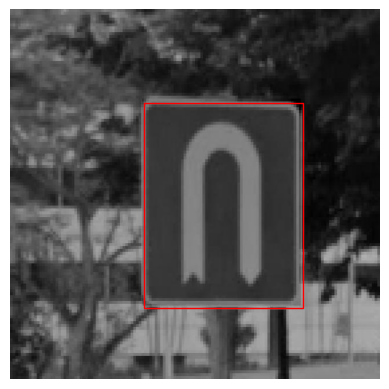

In [60]:
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Sample JSON data
json_data = {
    'predictions': [
        {
            'x': 368.5,
            'y': 339.0,
            'width': 275.0,
            'height': 354.0,
            'confidence': 0.9445533752441406,
            'class': 'road-sign',
            'class_id': 0,
            'detection_id': '32949f87-ce3b-49b7-8fe4-12f676ef60c7',
            'image_path': 'Road-Sign-Image-Detection-2/train/Screenshot-2024-04-08-181348_png.rf.ae5ff2f5f373b7ea3dce694c52b71a09.jpg',
            'prediction_type': 'ObjectDetectionModel'
        }
    ],
    'image': {
        'width': '640',
        'height': '640'
    }
}

# Extract image path and predictions
image_path = json_data['predictions'][0]['image_path']
predictions = json_data['predictions']

# Load the image
image = plt.imread(image_path)

# Create figure and axes
fig, ax = plt.subplots()

# Plot the image
ax.imshow(image)

# Plot each bounding box
for prediction in predictions:
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']
    
    # Calculate corner points
    x1 = x - (width / 2)
    y1 = y - (height / 2)
    rect = Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)

# Show the plot
plt.axis('off')
plt.show()
